# 3.4 차원축소, 특성 추출, 매니폴드 학습

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [2]:
import mglearn
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = "gray"
plt.rcParams['axes.unicode_minus'] = False

## 3.4.1 주성분 분석 (PCA)

* 정보손실 나지 않게 하기 위해 분산이 가장 큰 쪽으로 라인을 그리는 것이다.<br>
분산이 가장 큰 쪽(component1)에서 수직(component2)으로 선을 긋는다.<br>
원래방향으로 돌려놓는다.<br><br>
선형대수 관점에서 해석하면<br>
입력 데이터의 공분산 행렬을 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것입니다.

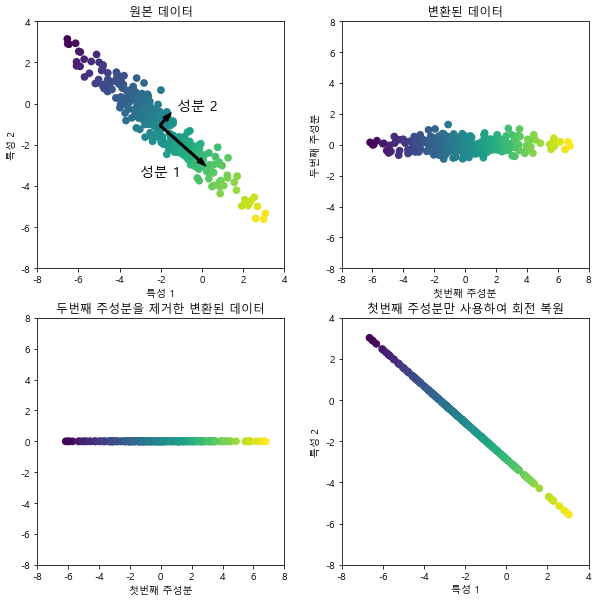

In [4]:
import mglearn
mglearn.plots.plot_pca_illustration()
#성분2 선 : 데이터가 분포되어있는 곳이 가장 긴곳(분산 큰곳) 
#제거하고 주성분만 남김

* PCA이 가장 널리 사용되는 분야는 고차원 데이터셋의 시각화 영역
유방암 데이터 악성, 양성 두 클래스에 대해 각 특성의 히스토그램을 그리면 보다 쉽게 해석 가능 

### 1) PCA 적용해 유방암 데이터셋 시각화하기

In [6]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import numpy as np
import mglearn
cancer = load_breast_cancer()

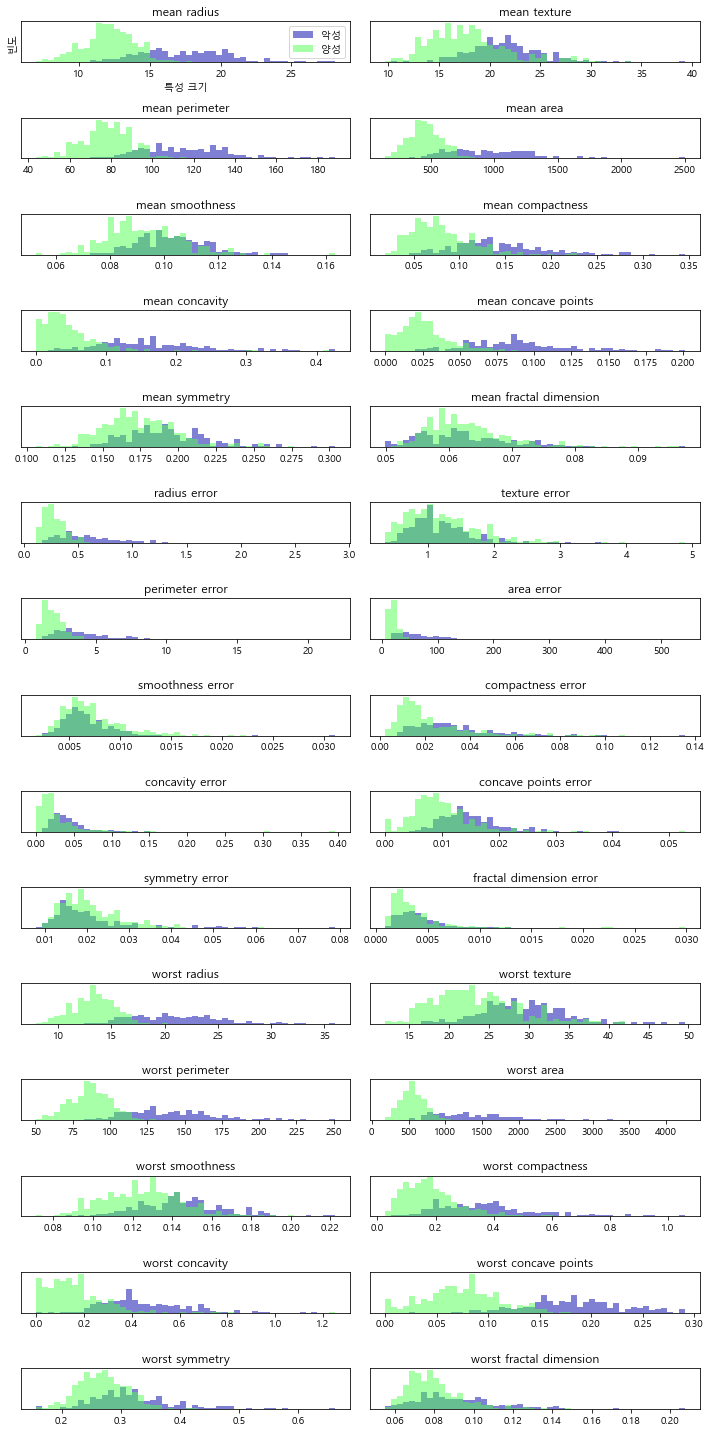

In [18]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50) 
    #30개의 데이터셋을 구간 50으로 나타냄
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel('특성 크기')
ax[0].set_ylabel('빈도')
ax[0].legend(['악성','양성'], loc='best')
fig.tight_layout()
# 악성 양성 거의 겹쳐져 있는 것은 좋은 feature가 아니야. 
# 구분 안되어 거의 쓸모없음 
# feature가 너무 많아서 시각화시켜서 보면서 중요한 feature만 골라내야해
# 두 히스토그램이 확실히 구분되어 매우 유용한 특성(worst concave point)이 좋다.

#### StandardScaler로 스케일링 (데이터전처리)

In [8]:
from sklearn.preprocessing import StandardScaler
# StandardScaler각 특성의 분산이 1이 되도록 조정
standard_scaler = StandardScaler()
standard_scaler.fit(cancer.data)
X_scaled = standard_scaler.transform(cancer.data)

#### PCA 주성분분석

In [9]:
# 주성분 분석 PCA(분산 가장 많은 부분과 수직인 성분 2를 긋는 것)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)#2개의 성분만 유지

#유방암 데이터로 PCA 모델을 만듭니다.
pca.fit(X_scaled)

#2개의 주성분을 사용해 데이터 변환
X_pca = pca.transform(X_scaled)
print("원본 데이터 형태 : {}".format(str(X_scaled.shape)))
print("축소된 데이터 형태 : {}".format(str(X_pca.shape)))

원본 데이터 형태 : (569, 30)
축소된 데이터 형태 : (569, 2)


#### 두개의 주성분 그래프 그리기

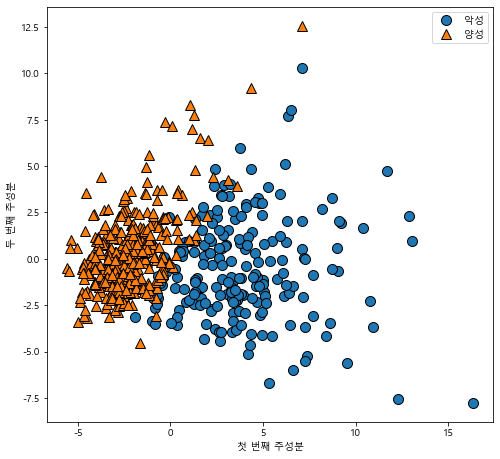

In [13]:
# 클래스를 색깔로 구분하여 처음 두 개의 주성분을 그래프로 나타냅니다.
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:,0], X_pca[:,1],cancer.target)
plt.legend(['악성', '양성'], loc='best')
plt.gca().set_aspect('equal')#정사각형 플롯
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.show()
# PCA는 비지도 학습이므로 회전축을 찾을때 어떤 클래스 정보도 사용하지 않는다.
# 데이터에 있는 상관관계만을 고려

In [14]:
print('PCA 주성분 : {}'. format(pca.components_.shape)) #속성값 찍을때 _ 씀
print('PCA 주성분 : {}'. format(pca.components_))

PCA 주성분 : (2, 30)
PCA 주성분 : [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


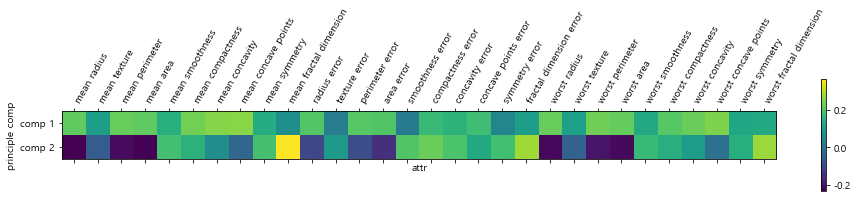

In [16]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['comp 1', 'comp 2'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha = 'left' )
plt.xlabel('attr')
plt.ylabel('principle comp')
plt.show()

* 첫번째 주성분은 한 특성의 값이 커지면 다른값들도 높아질 것이다. <br>
모든 특성 사이에 공통의 상호관계가 있다는 뜻이다.
* 두번째 주성분은 마이너스 부호도 있고 해서 설명하기 쉽지 않다.